In [22]:
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statistics
from statistics import mode

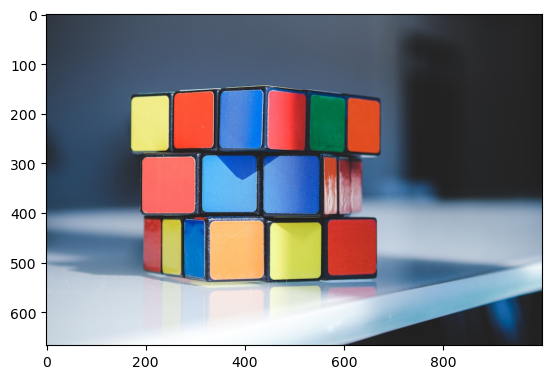

In [23]:
img = cv2.imread('RubixImgOriginal.jpeg')
rgbImg = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(rgbImg)
#HSV
hsvimg = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
#RGB - plt.imshow(cv2.cvtColor(rep,cv2.COLOR_HSV2RGB))

In [48]:
# # define range of blue color in HSV
lowerColor = np.array([10,100,150])
upperColor = np.array([25,180,255])
mask = cv2.inRange(hsvimg, lowerColor, upperColor)
hue = hsvimg[:,:,0]
median_hue = np.median(hue[mask > 0])
print(median_hue)
# # Bitwise-AND mask and original image
ResultBeforeMask = cv2.bitwise_and(img,img,mask = mask)
# # display the mask and masked image
#cv2.imshow('Mask',mask)
#cv2.waitKey(0)
cv2.imshow('Masked Image',ResultBeforeMask)
cv2.waitKey(0)
cv2.destroyAllWindows()


17.0


In [25]:
Replica = hsvimg.copy()
hue = hsvimg[:,:,0]

change =  -10 # It can be 20, -20, 50, -50 etc
hue[mask > 0] = hue[mask > 0] + change

# assign tohe modified hue channel back to the hsv image
condHigh = hue[:, :] > 180
hue[condHigh] = hue[condHigh] - 180

median_hue = np.median(hue[mask > 0])
print("Theoretical Hue",median_hue)




Theoretical Hue 69.0


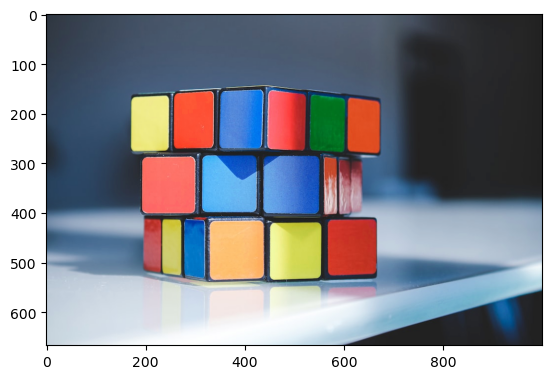

In [27]:
#Altering Replica Hue
ReplicaHsv = hsvimg.copy()
ReplicaHsv[:,:,0] = hue
ReplicaRGB = cv2.cvtColor(ReplicaHsv, cv2.COLOR_HSV2RGB)
plt.imshow(ReplicaRGB)


In [30]:
hue = rep[:,:,0]
saturation = rep[:,:,1]
value = rep[:,:,2]

#medianSaturation = np.median(saturation[mask > 0])
#medianValue = np.median(value[mask > 0])
medianHue = np.median(hue[mask > 0])

print("Median Hue Observed After Change",medianHue)
print("Mode Observation After Change : ",mode(hue[mask > 0]))
med = np.median(hue[mask > 0])
ReplicaResultAfterMask = cv2.bitwise_and(ReplicaRGB,ReplicaRGB, mask = mask)

# # DISPLAYS MASK IN BNW
#cv2.imshow('Mask',mask)
#cv2.waitKey(0)

#CV2 DEALS WITH BGR AS OUTPUT
cv2.imshow('Mask',cv2.cvtColor(ReplicaResultAfterMask, cv2.COLOR_RGB2BGR))
cv2.waitKey(0)
cv2.destroyAllWindows()

Median Hue Observed After Change 69.0
Mode Observation After Change :  69
